In [1]:
%%HTML
<style type="text/css">

div.h2 {
    background-color: darkolivegreen; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 20px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 50px;
}

</style>

In [2]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

'''Import basic modules.'''
import pandas as pd
import numpy as np
import scipy.stats as ss
import itertools
import statsmodels.api as sm

'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

## <font face="Impact">Is There a Relationship Between The Playing Surface and The Injury And Performance of NFL Athletes: A Statistical Analysis</font>
#### *VIKAS SINGH* (Master of Science in Economics)
                                                                        
![](http://www.kabu-load.net/data/out/103/IMG_1116842.jpg)

<a id='bg'></a>
<div class="h2">  Introduction</div>
The National Football League is America's most popular sports league, comprised of 32 franchises that compete each year to win the Super Bowl, the world's biggest annual sporting event. Founded in 1920, the NFL developed the model for the successful modern sports league, including national and international distribution, extensive revenue sharing, competitive excellence, and strong franchises across the country (https://www.kaggle.com/c/nfl-playing-surface-analytics). 

For the past three decades, the sports and medical communities have examined the danger of injury related to the sport of football. One constant issue of focus has been the comparison of injury rates related to playing on grass surfaces with injury rates related to playing on artificial surfaces. The NFL is making changes on and off the field to protect the health and safety of every player in the NFL. The NFL is championing new developments in engineering, biomechanics and material science designed to better protect against injuries in sports and recreation, as well as for the military. The NFL is investing in and supporting preeminent experts and institutions to advance progress in the prevention, diagnosis, and treatment of head injuries (https://www.playsmartplaysafe.com/). 


*Image Source: Insurance Quotes*

<img src="https://www.quotemaster.org/images/10/10ef72afb09aed3e035f49f7b6079b0f.png" align="left" width="400">

<a id='bg'></a>
<div class="h2"> Data Information</div>
The data provided for analysis are 250 complete player in-game histories from two subsequent NFL regular seasons. Three different files in .csv format are provided, documenting injuries, player-plays, and player movement during plays. This manual describes the specifics of each variable contained within the datasets as well as guidelines on the best approach to processing the information.

There are three files provided in the dataset, as described below:
* **Injury Record:** The injury record file in .csv format contains information on 105 lower-limb injuries that occurred during regular season games over the two seasons. Injuries can be linked to specific records in a player history using the PlayerKey, GameID, and PlayKey fields.

* **Play List:** The play list file contains the details for the 267,005 player-plays that make up the dataset. Each play is indexed by PlayerKey, GameID, and PlayKey fields. Details about the game and play include the player’s assigned roster position, stadium type, field type, weather, play type, position for the play, and position group.

* **Player Track Data:** Player level data that describes the location, orientation, speed, and direction of each player during a play recorded at 10 Hz (i.e. 10 observations recorded per second).

(https://www.kaggle.com/c/nfl-playing-surface-analytics/data)

<a id='bg'></a>
<div class="h2">Background</div>
The past studies has shown that use of artificial turf in American football continues to grow in popularity. Incidence of lower body injury rate is higher on synthetic turf than on natural turf among National Football League (NFL) games (Mack et al., 2018; Loughran et al., 2019).

The studies also shown that weather is associated with lower
knee and ankle injury risk in outdoor stadiums (both natural grass and AstroTurf), probably because of reduced shoe-surface traction (Orchard and Powell, 2003).

<a id='bg'></a>
<div class="h2">Hypothesis</div>
**Null Hypothesis:** There is no statistically significant relationship between injuries and playing surface, Temperature, Weather, PlayType, StadiumType, Position.

**Alternative Hypothesis:**There is a statistically significant relationship between injuries and playing surface,Temperature, Weather, PlayType, StadiumType, Position.

<a id='bg'></a>
<div class="h2">Methodology</div>
A total 96081 player-plays dataset inclusive were studied to determine associations between body parts injuries, playing surface, weather conditions, Temperature, PlayType, Position, and StadiumType.This study aimed to establish the influence of weather and game conditions on the frequency and nature of the injuries. First, we used exploratory data analysis to explore the data with visualization and graph plots. Second, we calculated the Cramer's V correlation and Pearson correlation to show the relationship between the selected variable, then We used a logistic regression model to validate the  Cramer's V correlation and Pearson correlation.

In [3]:
'''Read the dataset from csv file'''
df1 = pd.read_csv('../input/nfl-playing-surface-analytics/InjuryRecord.csv')
df2 = pd.read_csv('../input/nfl-playing-surface-analytics/PlayList.csv')
df3 = pd.read_csv('../input/nfl-playing-surface-analytics/PlayerTrackData.csv')

In [4]:
'''Merging the dataframes'''
merged_df = df1.merge(df2, on = 'PlayerKey', how = 'left')
merged_df.columns

Index(['PlayerKey', 'GameID_x', 'PlayKey_x', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42', 'GameID_y', 'PlayKey_y', 'RosterPosition',
       'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType', 'Temperature',
       'Weather', 'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup'],
      dtype='object')

<a id='bg'></a>
<div class="h2">Exploratory Data Analysis</div>
<span style='font-family:"Georgia"'> <span styel=''>This section will explore the data analysis with the help of graphs and plots. It will help us to know more about the data and for further statistical analysis.   

### <font face="Impact">1. Injured Body Part</font>

In [5]:
temp_df = merged_df['BodyPart'].value_counts().reset_index()
bold('**KNEE AND ANKLE BODY PART IS MOST FREQUENT INJURIRED PART**')
# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['BodyPart'],
                marker = dict(color = 'rgb(255,0,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark", width=500, height=500, xaxis = dict(title = 'Injured Body Part'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**KNEE AND ANKLE BODY PART IS MOST FREQUENT INJURIRED PART**

Injured body part is a dependent varianle for the analysis. The knees and ankles are the most frequently injured body part, while the heel is the least frequent. 
 
*Image Source: Pinkerton Law Firm* 

<img src="https://chadpinkerton.com/wp-content/uploads/Mueller-Sports-Medicine-Blog-Most-Common-NFL-Injuries-Infographic.gif" align="left" width="400" >


### <font face="Impact">2. Exploration of Surface, Field and Stadium Type</font> 

In [6]:
def pie_plot(cnt_srs, colors,title):
    labels=cnt_srs.index
    values=cnt_srs.values
    layout = go.Layout(width=500,height=500)
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.5,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2)))
    fig = go.Figure(data = trace, layout = layout)
    return iplot(fig) 

bold('**MORE PLAYER GOT INJURIED ON THE SYNTHETIC SURFACE**')
pie_plot(merged_df['Surface'].value_counts(), ['cyan', 'gold'], 'Surface Type')

bold('**MORE GAMES PLAYED ON NATURAL SURFACE**')
pie_plot(merged_df['FieldType'].value_counts(), ['magenta', 'blue'], 'Field Type')

######################################################################################################################################
temp_df = merged_df['StadiumType'].value_counts().reset_index()

# create trace1
bold('**MORE GAMES PLAYED ON OUTDOOR STADIUMS**')
trace1 = go.Bar(
                y = temp_df['index'],
                x = temp_df['StadiumType'],
                orientation="h",            
                marker = dict(color = 'rgb(0,255,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark", width=500, height=500, xaxis = dict(title = 'NO. of Game Played'), yaxis = dict(title = 'Stadium Type'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**MORE PLAYER GOT INJURIED ON THE SYNTHETIC SURFACE**

**MORE GAMES PLAYED ON NATURAL SURFACE**

**MORE GAMES PLAYED ON OUTDOOR STADIUMS**

The above plots show that 150 injuries out of 57 injuries occurred on the synthetic playing surface, and 48 injuries occurred on the natural surface.  The total number of games played on the natural surface is 156,902, which is more than the 110,103 games played on the synthetic surface.

**NUMBER OF NFL REGULAR SEASON DAYS MISSED BY INJURY TYPE**

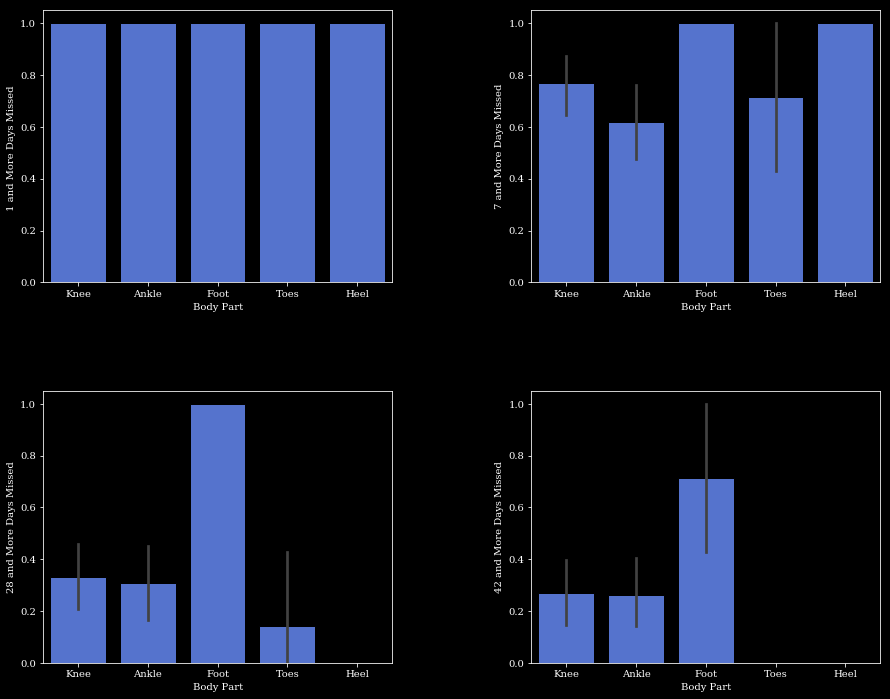

In [7]:
bold('**NUMBER OF NFL REGULAR SEASON DAYS MISSED BY INJURY TYPE**')
plt.rcParams['font.family'] = "serif"
plt.style.use("dark_background")
f, axes = plt.subplots (2,2, figsize=(15,12))
ax1 = sns.barplot(x ='BodyPart', y='DM_M1',data=df1,ax=axes[0,0], color = 'royalblue',edgecolor= 'black')
ax2 = sns.barplot(x ='BodyPart', y='DM_M7',data=df1,ax=axes[0,1], color = 'royalblue', edgecolor= 'black')
ax3 = sns.barplot(x ='BodyPart', y='DM_M28',data=df1, ax=axes[1,0], color = 'royalblue', edgecolor= 'black')
ax4 = sns.barplot(x ='BodyPart', y='DM_M42',data=df1, ax=axes[1,1], color = 'royalblue', edgecolor= 'black')
ax1.set(xlabel='Body Part',ylabel='1 and More Days Missed ')
ax2.set(xlabel='Body Part',ylabel='7 and More Days Missed')
ax3.set(xlabel='Body Part',ylabel='28 and More Days Missed')
ax4.set(xlabel='Body Part',ylabel='42 and More Days Missed')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

* It is obverse each player was missing one and more days when they injured.
* Foot injuries are more serious than other body parts because players are missing 42 days.   
* For Knee, Ankle, and Toes body part seven and more days are average missing days.    
 

## <font face="Impact">3. Postions and Roster Position</font> 

In [8]:
temp_df = merged_df['RosterPosition'].value_counts().reset_index()
bold('**LR AND WR HAVE HIGHEST ROSTER POSTION**')
# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['RosterPosition'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",width=500, height=500, xaxis = dict(title = 'Roster Position'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**LR AND WR HAVE HIGHEST ROSTER POSTION**

Roster Position defined as the official manifest of players on the team. In the NFL, teams are allowed to have fifty-three men on their roster, though only forty-six are allowed to be active for any given game. As we know, **Wide receivers**, for the most part, are known as pass catchers and **Linebacker(LB)** – As the name implies, the Linebackers back the defensive line. Depending on the defensive alignment, there are usually three or four on the field.

In [9]:
temp_df = merged_df['Position'].value_counts().reset_index()
bold('**MORE PLAYER INJURED ON WR, CB, OLB POSITION**')
# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['Position'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",width=500, height=500 , xaxis = dict(title = 'Positions'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**MORE PLAYER INJURED ON WR, CB, OLB POSITION**

*Image Source: https://www.forwardprogress.online/*

<img src="https://i1.wp.com/www.forwardprogress.online/wp-content/uploads/2018/09/football-template-w-key.png?fit=917%2C367&ssl=1" align="left" width="60%">

In [10]:
temp_df = merged_df['PositionGroup'].value_counts().reset_index()
bold('**MORE PLAYER INJURED ON DEFENSIVE BACKS POSITION GROUP**')
# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['PositionGroup'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",width=500, height=500, xaxis = dict(title = 'Position Group'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**MORE PLAYER INJURED ON DEFENSIVE BACKS POSITION GROUP**

*Image Source: https://myfootballmentor.com/*

<img src="http://myfootballmentor.com/wp-content/uploads/2011/09/football-O-Defense.jpg" align="left" width="60%">

In [11]:
data1 = merged_df[merged_df["BodyPart"] == "Ankle"]
data2 = merged_df[merged_df["BodyPart"] == "Knee"]
data3 = merged_df[merged_df["BodyPart"] == "Toes"]
data4 = merged_df[merged_df["BodyPart"] == "Foot"]
data5 = merged_df[merged_df["BodyPart"] == "Heel"]

temp_df1 = data1['Position'].value_counts().reset_index()
temp_df2 = data2['Position'].value_counts().reset_index()
temp_df3 = data3['Position'].value_counts().reset_index()
temp_df4 = data4['Position'].value_counts().reset_index()
temp_df5 = data5['Position'].value_counts().reset_index()

bold('**INJURY RISK BY POSITION**')
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['Position'],
                name="Ankle",
                marker = dict(color = 'rgb(255,5,97)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['Position'],
                name = "Knee",
                marker = dict(color = 'rgb(136,18,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

trace3 = go.Bar(
                x = temp_df3['index'],
                y = temp_df3['Position'],
                name = "Toes",
                marker = dict(color = 'rgb(162,255,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
trace4 = go.Bar(
                x = temp_df4['index'],
                y = temp_df4['Position'],
                name = "Foot",
                marker = dict(color = 'rgb(255,173,10)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
trace5 = go.Bar(
                x = temp_df5['index'],
                y = temp_df5['Position'],
                name = "Heel",
                marker = dict(color = 'rgb(255,255,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",width=800,height=500, xaxis = dict(title = 'Position'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2,trace3,trace4,trace5], layout = layout)
fig.show()

**INJURY RISK BY POSITION**

**SHOWING THE RELATION BETWEEN POSITION AND ROSTER POSITION**

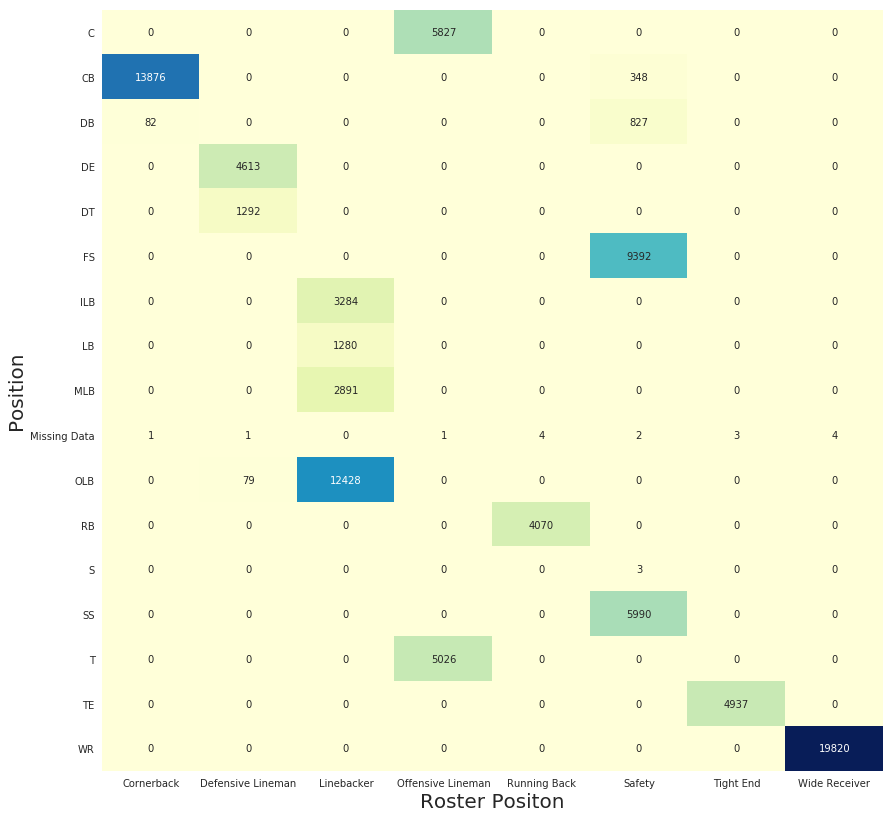

In [12]:
#Idea given by @jpmiller> https://www.kaggle.com/c/nfl-playing-surface-analytics/discussion/122529#701743
bold('**SHOWING THE RELATION BETWEEN POSITION AND ROSTER POSITION**')
temp_df = pd.crosstab(merged_df.Position, merged_df.RosterPosition)
plt.rcParams['figure.figsize'] = (14,14)
sns.set_style("white")
sns.heatmap(temp_df, cmap="YlGnBu", annot=True,fmt='g', cbar=False)
plt.xlabel('Roster Positon',fontsize = 20)
plt.ylabel('Position',fontsize = 20)
plt.show()

**SHOWING THE COMPRAHENSIVE RELATION BETWEEN POSITION AND ROSTER POSITION WITH BODY PART AND SURFACE TYPE**

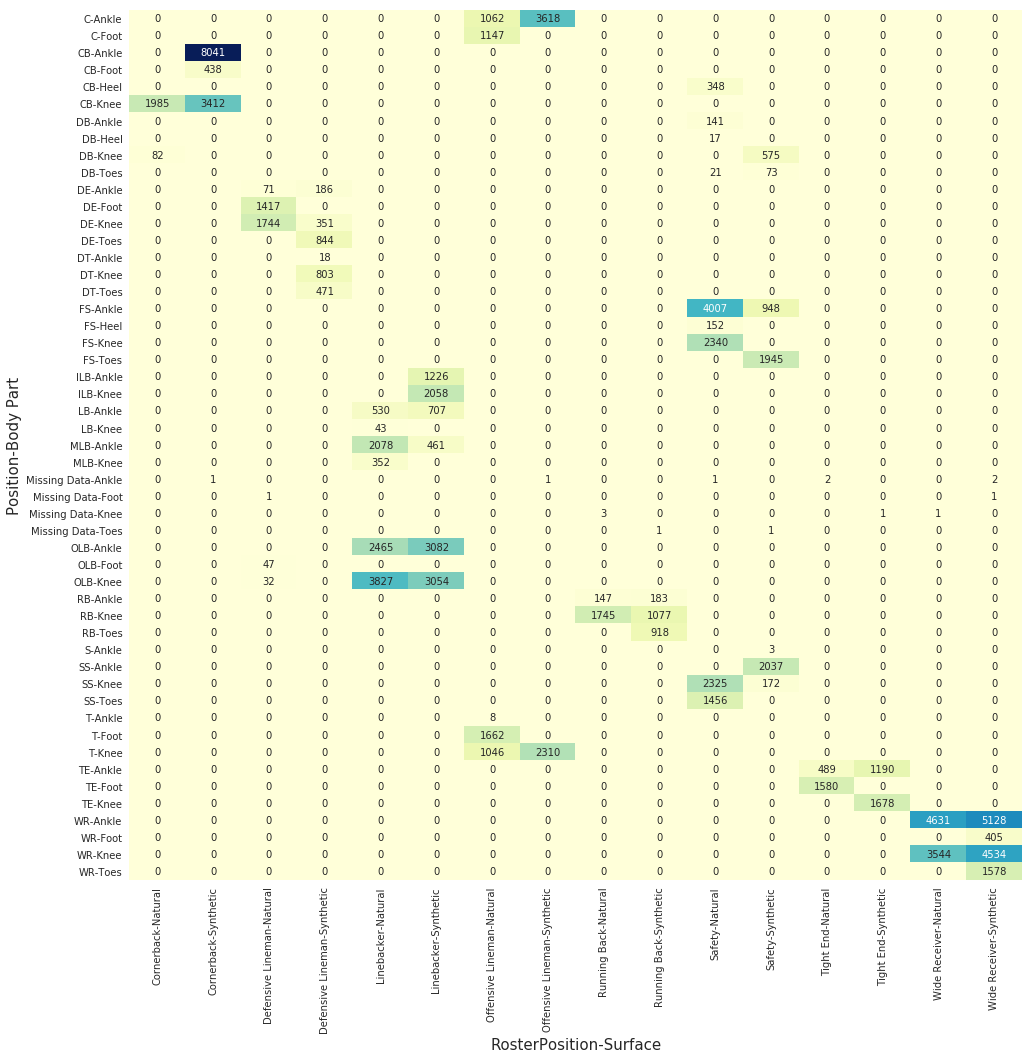

In [13]:
bold('**SHOWING THE COMPRAHENSIVE RELATION BETWEEN POSITION AND ROSTER POSITION WITH BODY PART AND SURFACE TYPE**')
temp_df = pd.crosstab([merged_df.Position, merged_df.BodyPart], [merged_df.RosterPosition,merged_df.Surface])
plt.rcParams['figure.figsize'] = (16,16)
sns.heatmap(temp_df, cmap="YlGnBu", annot=True,fmt='g', cbar=False)
plt.xlabel('RosterPosition-Surface',fontsize = 15)
plt.ylabel('Position-Body Part',fontsize = 15)
plt.show()

 #### <font color="blue">FINDINGS:</font>
 Most players injured on the position are Wide Receivers, Outside Linebackers, and Cornerbacks with the highest number of knee, ankle injuries. 

Knee injuries significantly more than ankle injuries on the position Outside Linebackers, Offensive Tackle, Defensive End, Running Back.  

In conclusion, Wide Receivers is dangerous position with highest injuries risk because the hits can be especially violent with   players going at full speed. Every position in American football is dangerous, but according the data receiver position is probably the most likely to incur catastrophic injuries. 

### <font face="Impact">4. Play Type</font> 

In [14]:
data1 = merged_df[merged_df["Surface"] == "Synthetic"]
data2 = merged_df[merged_df["Surface"] == "Natural"]

temp_df1 = data1['PlayType'].value_counts().reset_index()
temp_df2 = data2['PlayType'].value_counts().reset_index()

bold('**INJURY RISK BY PLAY TYPE AND SURFACE TYPE**')
# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['PlayType'],
                name="Synthetic",
                marker = dict(color = 'cyan',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['PlayType'],
                name = "Natural",
                marker = dict(color = 'gold',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",width=500,height=500, xaxis = dict(title = 'Play Type'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

**INJURY RISK BY PLAY TYPE AND SURFACE TYPE**

In [15]:
data1 = merged_df[merged_df["BodyPart"] == "Ankle"]
data2 = merged_df[merged_df["BodyPart"] == "Knee"]
data3 = merged_df[merged_df["BodyPart"] == "Toes"]
data4 = merged_df[merged_df["BodyPart"] == "Foot"]
data5 = merged_df[merged_df["BodyPart"] == "Heel"]

temp_df1 = data1['PlayType'].value_counts().reset_index()
temp_df2 = data2['PlayType'].value_counts().reset_index()
temp_df3 = data3['PlayType'].value_counts().reset_index()
temp_df4 = data4['PlayType'].value_counts().reset_index()
temp_df5 = data5['PlayType'].value_counts().reset_index()

bold('**INJURY RISK BY PLAY TYPE AND BODY PART**')
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['PlayType'],
                name="Ankle",
                marker = dict(color = 'rgb(255,5,97)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['PlayType'],
                name = "Knee",
                marker = dict(color = 'rgb(136,18,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

trace3 = go.Bar(
                x = temp_df3['index'],
                y = temp_df3['PlayType'],
                name = "Toes",
                marker = dict(color = 'rgb(162,255,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
trace4 = go.Bar(
                x = temp_df4['index'],
                y = temp_df4['PlayType'],
                name = "Foot",
                marker = dict(color = 'rgb(255,173,10)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
trace5 = go.Bar(
                x = temp_df5['index'],
                y = temp_df5['PlayType'],
                name = "Heel",
                marker = dict(color = 'rgb(255,255,255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(template= "plotly_dark",width=800,height=500, xaxis = dict(title = 'Play Type'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2,trace3,trace4,trace5], layout = layout)
fig.show()

**INJURY RISK BY PLAY TYPE AND BODY PART**

Pass play type is a throwing of the ball in the direction that the offensive team is trying to move, towards the defensive team's goal line. According to the above plot players most involved in pass plays appear to be at increased risk for concussions. Pass and Rush play type players are more injured on the synthentic surface compare to the natural surface. while Punt and Kickoff play type player are more more injured on the natural surface.

### <font face="Impact">5. Temperature, Weather</font> 

In [16]:
merged_df.drop(merged_df[merged_df.Temperature == -999].index, inplace = True)
merged_df.reset_index(drop = True, inplace = True)
import plotly.figure_factory as ff
bold('**AVERGAE TEMPERATURE DURING THE SEASON IS 61.46 FAHRENHEIT**')

fig = ff.create_distplot([merged_df['Temperature']],['Temp'],bin_size=0.5,colors=['#94F3E4'])

fig.update_layout(template= "plotly_dark",width=500, height=500,yaxis = dict(title = 'Density'))
fig.show()

**AVERGAE TEMPERATURE DURING THE SEASON IS 61.46 FAHRENHEIT**

In [17]:
temp_df = merged_df['Weather'].value_counts()[:10].reset_index()

bold('**MOST OF INJURIES IN CLOUDY AND SUNNY WEATHER**')
# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['Weather'],
                marker = dict(color = '#F64E8B',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",width=500, height=500 , xaxis = dict(title = 'Weather'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**MOST OF INJURIES IN CLOUDY AND SUNNY WEATHER**

### <font face="Impact">6. Speed</font> 

**AVERAGE SPEED OF THE PLAYERS IN GROUND IS 1.28 YARDS PER SECOND**

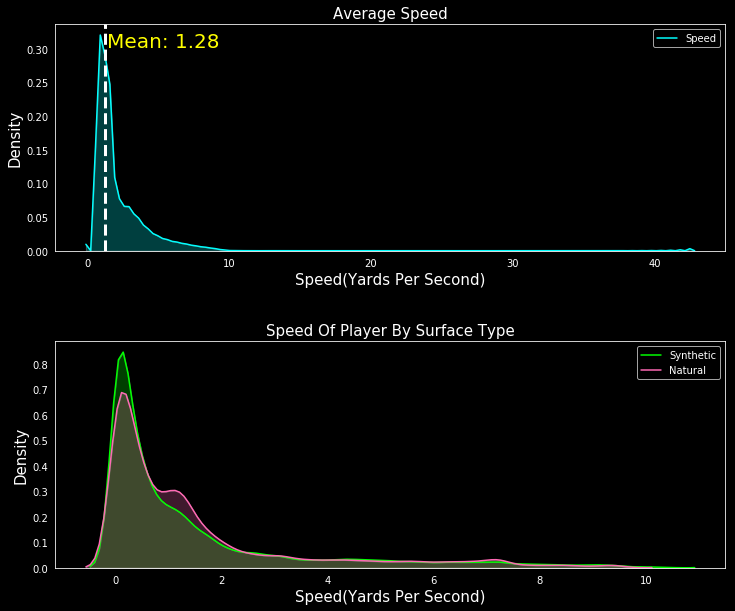

In [18]:
bold('**AVERAGE SPEED OF THE PLAYERS IN GROUND IS 1.28 YARDS PER SECOND**')
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = (12,10)
plt.subplot(211)
sns.kdeplot(df3['s'], shade = True, color = 'cyan', label = "Speed")
plt.axvline(df3['s'].mean(), color='w', linestyle='dashed', linewidth=3)
min_ylim, max_ylim = plt.ylim()
plt.text(df3['s'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df3['s'].mean()),fontdict={'size':20},color='yellow')
plt.title('Average Speed', fontsize = 15)
plt.xlabel('Speed(Yards Per Second)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

plt.rcParams['figure.figsize'] = (12,10)
plt.subplot(212)
merged_df2 = df1.merge(df3, on = 'PlayKey', how = 'left')
merged_df2 = merged_df2.merge(df2, on = 'PlayKey', how = 'left')
temp_df = merged_df2[merged_df2["Surface"]=="Synthetic"]
ax = sns.kdeplot(merged_df2['s'].dropna(), shade = True, label="Synthetic", color = 'lime')
temp_df = merged_df2[merged_df2["Surface"]=="Natural"]
ax = sns.kdeplot(temp_df['s'].dropna(), shade = True, label="Natural", color = 'hotpink')
plt.title('Speed Of Player By Surface Type', fontsize = 15)
plt.xlabel('Speed(Yards Per Second)', fontsize = 15)
plt.ylabel('Density', fontsize = 15)


plt.subplots_adjust(hspace = 0.4)
plt.show()

**KICKOFF NOT RETURNED PLAY TYPE PLAYERS HAVE MORE AVERAGE SPEED COMPARE TO THE OTHER PLAY TYPE PLAYERS**

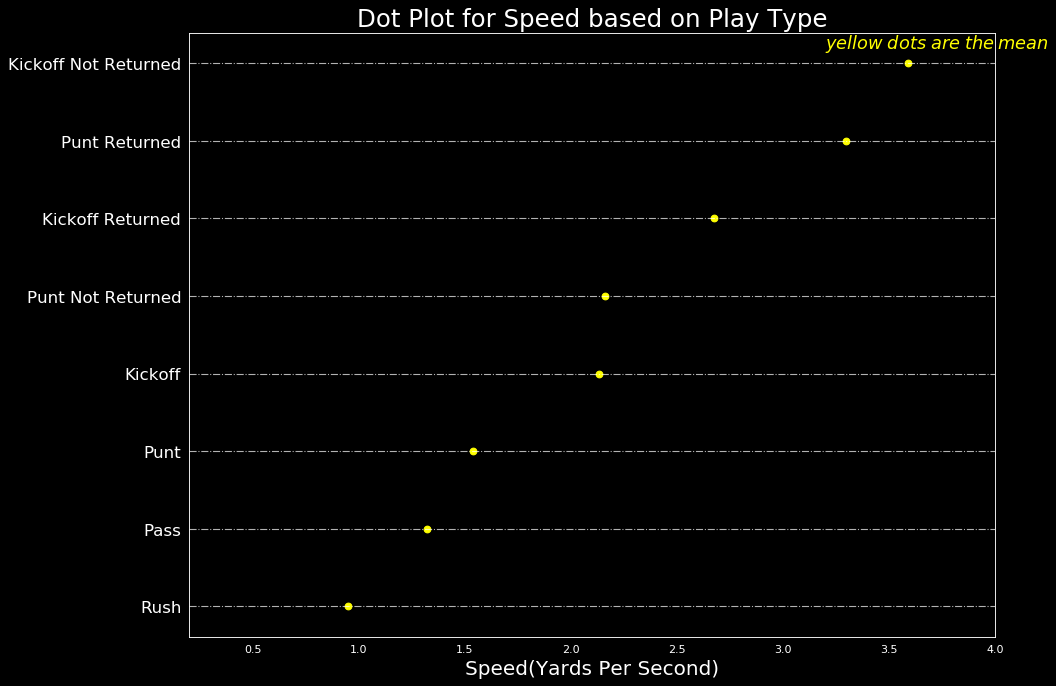

In [19]:
bold('**KICKOFF NOT RETURNED PLAY TYPE PLAYERS HAVE MORE AVERAGE SPEED COMPARE TO THE OTHER PLAY TYPE PLAYERS**')
temp_df = merged_df2[['s', 'PlayType']].groupby('PlayType').apply(lambda x: x.mean())
temp_df.sort_values('s', inplace=True)
temp_df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(13,10), dpi= 80)
ax.hlines(y=temp_df.PlayType, xmin=0.2, xmax=4, color='white', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=temp_df.PlayType, x=temp_df.s,  color='yellow')

# Title, Label, Ticks and Ylim
ax.text(3.2, 7.2, "$yellow \; dots \; are \; the \: mean$", fontdict={'size':16}, color='yellow')

ax.set_title('Dot Plot for Speed based on Play Type', fontdict={'size':22})
ax.set_xlabel('Speed(Yards Per Second)', fontdict={'size':18})
ax.set_yticks(temp_df.PlayType)
ax.set_yticklabels(temp_df.PlayType, fontdict={'horizontalalignment': 'right'},fontsize=15)
ax.set_xlim(0.2, 4)
plt.show()

**DB AND TE POSITION PLAYERS HAVE MORE AVERAGE SPEED COMPARE TO THE OTHER POSITION PLAYERS**

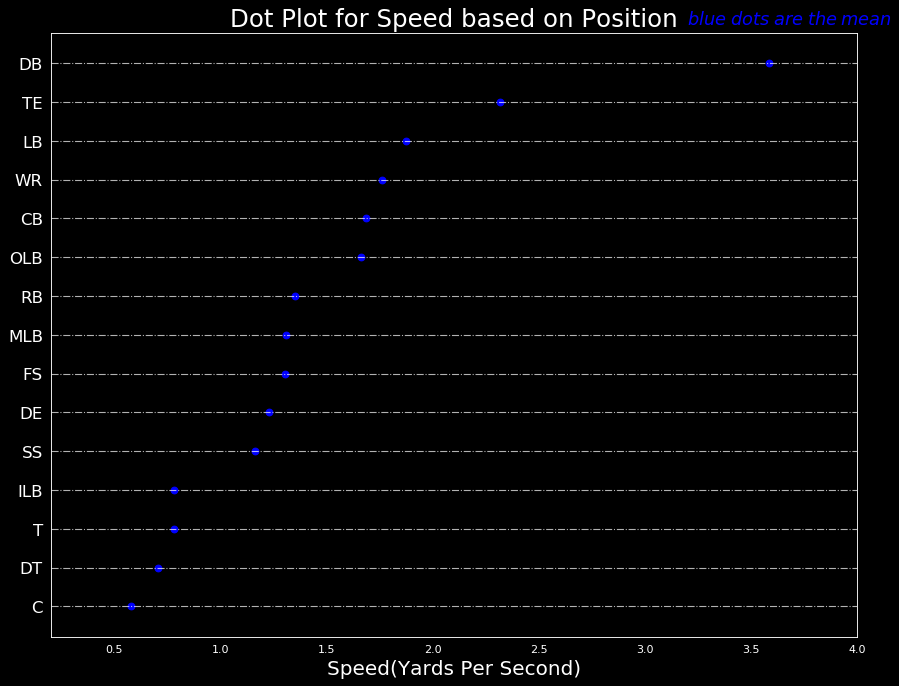

In [20]:
bold('**DB AND TE POSITION PLAYERS HAVE MORE AVERAGE SPEED COMPARE TO THE OTHER POSITION PLAYERS**')
temp_df = merged_df2[['s', 'Position']].groupby('Position').apply(lambda x: x.mean())
temp_df.sort_values('s', inplace=True)
temp_df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(13,10), dpi= 80)
ax.hlines(y=temp_df.Position, xmin=0.2, xmax=4, color='white', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=temp_df.Position, x=temp_df.s,  color='blue')

# Title, Label, Ticks and Ylim
ax.text(3.2, 15, "$blue \; dots \; are \; the \: mean$", fontdict={'size':16}, color='blue')

ax.set_title('Dot Plot for Speed based on Position', fontdict={'size':22})
ax.set_xlabel('Speed(Yards Per Second)', fontdict={'size':18})
ax.set_yticks(temp_df.Position)
ax.set_yticklabels(temp_df.Position, fontdict={'horizontalalignment': 'right'},fontsize=15)
ax.set_xlim(0.2, 4)
plt.show()

 #### <font color="blue">FINDINGS:</font>
The average speed of the player on the ground is 1.28 yards per second. When we compare the speed with a different surface, no significant difference is found, but on the synthetic surface, the player can gain top speed.
    
Dot Plot for Speed based on Position and Play Type shows that DB position and Kick off retured  play type players have more average speed campared to the other player.

<a id='bg'></a>
<div class="h2">Statistical Analysis</div>
In this section, we have selected the variables for the study are body parts injuries, playing surface, weather conditions, Temperature, PlayType, Position, and StadiumType.We calculated the Cramer's V correlation and Pearson correlation to show the relationship between the selected variable, then We used a logistic regression model to validate the  Cramer's V correlation and Pearson correlation.

In [21]:
'''Final data for statistical analysis'''
final_df = merged_df[['BodyPart','Surface', 'Temperature', 'Weather', 'PlayType', 'Position','StadiumType']]

In [22]:
'''Variable Description'''
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

display(description(final_df))

Name  dtypes  Missing  Uniques    First Value   Second Value  \
0     BodyPart  object        0        5           Knee           Knee   
1      Surface  object        0        2      Synthetic      Synthetic   
2  Temperature   int64        0       77             85             85   
3      Weather  object     2961       61  Mostly Cloudy  Mostly Cloudy   
4     PlayType  object      108       11        Kickoff        Kickoff   
5     Position  object        0       17            OLB            OLB   
6  StadiumType  object     5096       24        Indoors        Indoors   

     Third Value  
0           Knee  
1      Synthetic  
2             85  
3  Mostly Cloudy  
4        Kickoff  
5            OLB  
6        Indoors

### <font face="Impact">1. Feature Engineering</font> 

In [23]:
'''Imputing Missing Variable'''
final_df.dropna(inplace=True)
final_df.drop(final_df[final_df.PlayType == '0'].index, inplace = True)
final_df.drop(final_df[final_df.Position == 'Missing Data'].index, inplace = True)
final_df.reset_index(drop = True, inplace = True)

In [24]:
'''Grouping the StadiumType variable'''
final_df['StadiumType'].replace(['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 
                                 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl'], 'outdoor', inplace=True)

final_df['StadiumType'].replace(['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed',  'Retractable Roof',
                                 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed'], 'indoor_closed',inplace=True)


final_df['StadiumType'].replace(['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open'],'indoor_open',inplace=True)

final_df['StadiumType'].replace(['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed'],'dome_closed',inplace=True)

final_df['StadiumType'].replace(['Domed,Open','Domed, open'],'dome_open',inplace=True)

'''Grouping the Weather variable'''
final_df['Weather'].replace(['10% Chance of Rain','30% Chance of Rain', 'Rainy', 'Rain Chance 40%', 'Showers', 'Cloudy, 50% change of rain', 
                             'Rain likely, temps in low 40s.','Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
                             'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain'], 'rain',inplace=True)

final_df['Weather'].replace(['Clear to Partly Cloudy','Party Cloudy', 'Cloudy, chance of rain','Coudy', 'Cloudy and cold', 
                             'Cloudy, fog started developing in 2nd quarter','Partly Clouidy', 'Mostly Coudy', 'Cloudy and Cool',
                             'cloudy', 'Partly cloudy', 'Overcast', 'Hazy', 'Mostly cloudy', 'Mostly Cloudy',
                             'Partly Cloudy', 'Cloudy'],'overcast',inplace=True)

final_df['Weather'].replace(['Heat Index 95','Sunny, Windy','Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny','Sunny and cold', 'Sunny Skies', 
                             'Clear and Cool', 'Clear and sunny','Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold',
                             'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
                             'T: 51; H: 55; W: NW 10 mph', 'Clear Skies', 'Clear skies', 'Partly sunny',
                             'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny'],'clear',inplace=True)

final_df['Weather'].replace(['Cloudy, light snow accumulating 1-3"', 'Heavy lake effect snow', 'Snow'],'snow',inplace=True)

final_df['Weather'].replace(['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate'],'N/A (Indoors)',inplace=True)

In [25]:
"""Encoding catagorical variable"""
cat_var = pd.get_dummies(final_df[['Surface', 'Weather', 'PlayType', 'Position',
       'StadiumType']], drop_first=True, dtype=float)

"""Standardizing the numerical variable"""
num_var = final_df['Temperature']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_var_scaled = scaler.fit_transform(num_var.values.reshape(-1, 1))
num_var_scaled = pd.DataFrame(data = num_var_scaled, columns = ['Temperature'])

"""Joining encoded cat_var and scaled num_var"""
final_df_processed = pd.concat([num_var_scaled, cat_var], axis=1)

In [26]:
'''Preview processed data'''
final_df_processed.sample(7)

Temperature  Surface_Synthetic  Weather_clear  Weather_overcast  \
8865      1.012571                0.0            1.0               0.0   
38295    -1.255480                1.0            1.0               0.0   
51829     0.388857                0.0            0.0               0.0   
22794     0.615662                0.0            0.0               1.0   
55283     0.388857                0.0            1.0               0.0   
37801     1.182675                1.0            1.0               0.0   
34430     0.558961                1.0            0.0               1.0   

       Weather_rain  Weather_snow  PlayType_Field Goal  PlayType_Kickoff  \
8865            0.0           0.0                  0.0               0.0   
38295           0.0           0.0                  0.0               0.0   
51829           0.0           0.0                  0.0               0.0   
22794           0.0           0.0                  0.0               0.0   
55283           0.0           0.0                  0.0               0.0   
37801           0.0           0.0                  0.0               0.0   
34430           0.0           0.0                  0.0               0.0   

       PlayType_Kickoff Not Returned  PlayType_Kickoff Returned  ...  \
8865                             1.0                        0.0  ...   
38295                            0.0                        0.0  ...   
51829                            0.0                        0.0  ...   
22794                            0.0                        0.0  ...   
55283                            0.0                        0.0  ...   
37801                            0.0                        0.0  ...   
34430                            0.0                        0.0  ...   

       Position_RB  Position_S  Position_SS  Position_T  Position_TE  \
8865           1.0         0.0          0.0         0.0          0.0   
38295          1.0         0.0          0.0         0.0          0.0   
51829          0.0         0.0          0.0         0.0          0.0   
22794          0.0         0.0          0.0         0.0          0.0   
55283          0.0         0.0          0.0         0.0          0.0   
37801          1.0         0.0          0.0         0.0          0.0   
34430          0.0         0.0          0.0         0.0          0.0   

       Position_WR  StadiumType_dome_open  StadiumType_indoor_closed  \
8865           0.0                    0.0                        0.0   
38295          0.0                    0.0                        0.0   
51829          0.0                    0.0                        1.0   
22794          0.0                    0.0                        0.0   
55283          0.0                    0.0                        0.0   
37801          0.0                    0.0                        0.0   
34430          0.0                    0.0                        0.0   

       StadiumType_indoor_open  StadiumType_outdoor  
8865                       0.0                  1.0  
38295                      0.0                  1.0  
51829                      0.0                  0.0  
22794                      0.0                  1.0  
55283                      0.0                  1.0  
37801                      0.0                  1.0  
34430                      0.0                  1.0  

[7 rows x 34 columns]

In [27]:
"""Define the output and input variable"""
target = pd.get_dummies(final_df['BodyPart'], dtype=float)

x = final_df_processed
y1= target['Ankle']
y2 = target['Knee']
y3 = target['Heel']
y4 = target['Foot']
y5 = target['Toes']

In [28]:
"""Let's have a final look at data dimension"""
print('Input matrix dimension:', x.shape)
print('Output matrix dimension:', y1.shape)

Input matrix dimension: (79872, 34)
Output matrix dimension: (79872,)


### <font face="Impact">2. Correlation</font> 

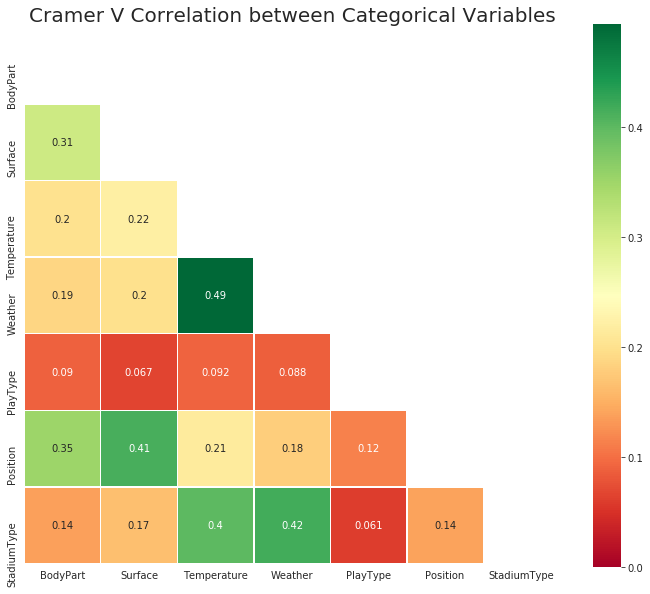

In [29]:
# source: https://www.kaggle.com/phaethonprime/eda-and-logistic-regression
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cols = [ 'BodyPart','Surface', 'Temperature', 'Weather', 'PlayType', 'Position','StadiumType']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(merged_df[col1], merged_df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12,10)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap = 'RdYlGn', square=True, linewidths=.5,annot=True)
plt.title("Cramer V Correlation between Categorical Variables",fontsize=20)
plt.show()

In statistics, Cramér's V (sometimes referred to as Cramér's phi and denoted as φc) is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946 (*Mathematical Methods of Statistics*, Cramér, 1946). Above Cramer's V correlation plot based on the categorical data without any encoding indicates the **weak association** between the selected variable. Temperature and Weather are showing **moderate association** at 0.49. When we compare our dependent variable (BodyPart) with other independent variables only PlayType is showing **no association** but other variables are showing weak association.

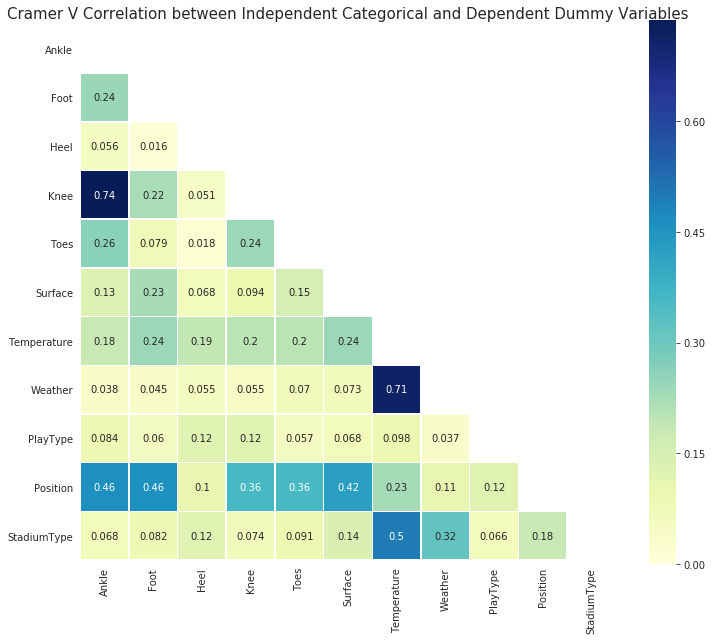

In [30]:
temp_df = pd.concat([final_df[['Surface', 'Weather', 'PlayType', 'Position',
       'StadiumType','Temperature']],target],axis=1)
cols = [ 'Ankle','Foot','Heel','Knee','Toes','Surface', 'Temperature', 'Weather', 'PlayType', 'Position','StadiumType']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(temp_df[col1], temp_df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
plt.rcParams['figure.figsize'] = (12,10)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap="YlGnBu",square=True, linewidths=.5, annot=True)
plt.title("Cramer V Correlation between Independent Categorical and Dependent Dummy Variables",fontsize=15)
plt.show()

Now, this plot showing some interesting results, here we encoded the dependent variable (BodyPart) into dummy variables. 
* Strong Association:
   * Between Temp. and weather at 0.71
   * Between Ankel and Knee at 0.74
* Moderate Association:
   * Between Temp. and Stadium type at 0.5
   * Between Position and Ankle, Foot at 0.46
* Weak Association:
   * Between Position and Knee, Toes, Surface
   * Between Suface and Ankle and Knee

There are many other variables have a weak association with dependent variables. Some of the independent variables have no association with dependent variables.      


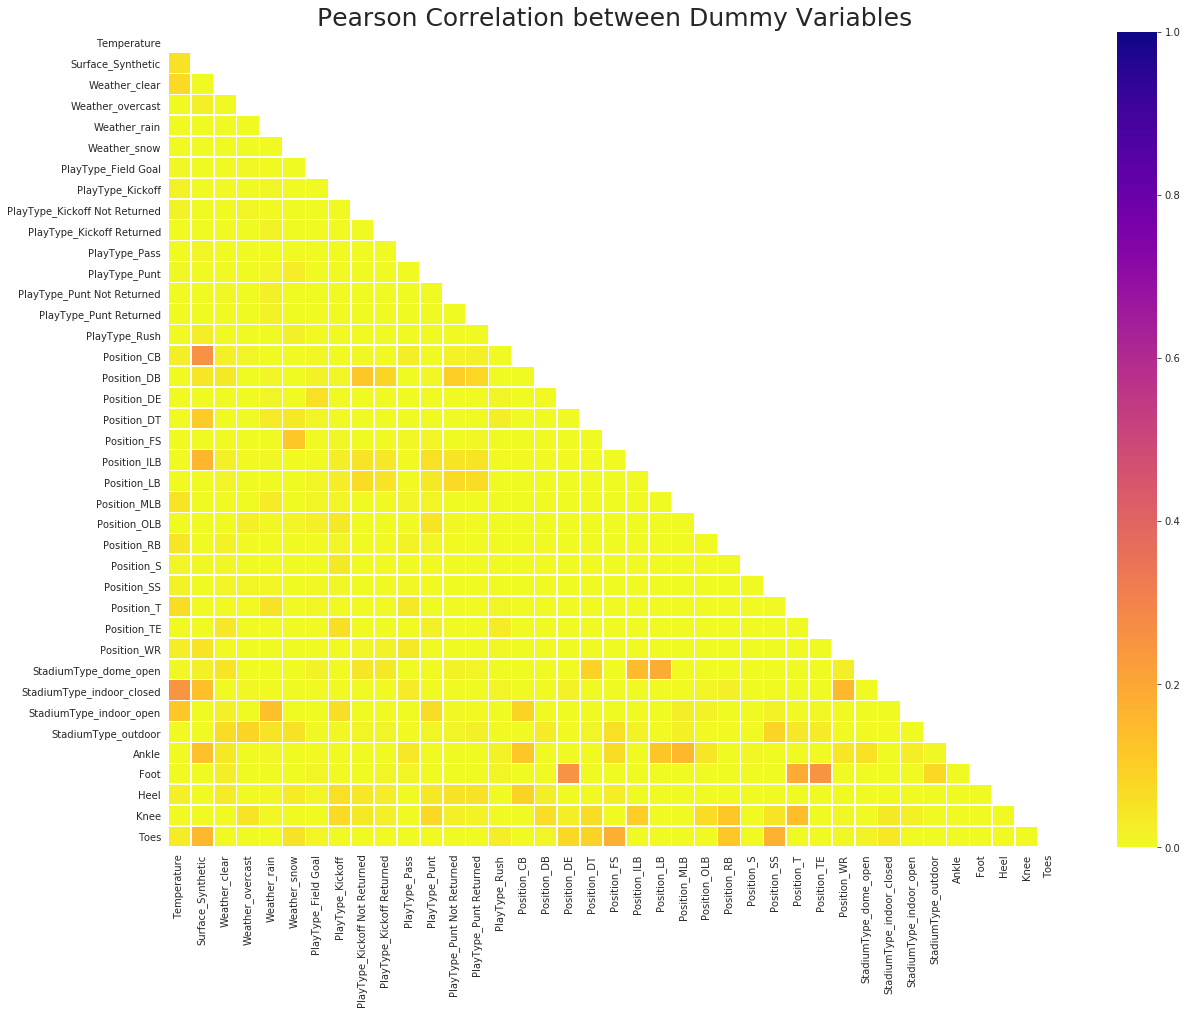

In [31]:
temp_df = pd.concat([x,target],axis=1)
corr = temp_df.corr()
sns.set_style("white")
plt.rcParams['figure.figsize'] = (20,15)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='plasma_r',linewidths=.5, vmin=0, vmax=1)
plt.title("Pearson Correlation between Dummy Variables", fontsize=25)
plt.show()

Here, we applied dummy on all the variables than calculated pearson correlation. In statistics, the Pearson correlation coefficient (PCC, pronounced /ˈpɪərsən/), also referred to as Pearson's r, the Pearson product-moment correlation coefficient (PPMCC) or the bivariate correlation, is a measure of the linear correlation between two variables X and Y (*SPSS Tutorials: Pearson Correlation*). It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation but in the above plot we ignore the negative value because negative correlation between categorical variable make no sense. 

We can observe that dark color in the plot is showing some correlation between the variables are: 
* Between Temp. and StadiumType_indoor_open, StadiumType_indoor_close, weather_clear
* Between Ankle and Weather_clear, surface_synthtic, PlayType_pass, StadiumType_outdoor, Position_CB, FS, MLB, WR
* Between Foot and Weather_clear, Position_DE,T,TE
* Between Heel and Weather_clear, Weather_show, PlayType_Kickoff, Punt_not_returned,Puntoff_returned, Position_CB
* Between Kee and Weather_overcast, PlayType_Kickoff, PlayTpe_Punt, Position_DB,DT,ILB, RB,T
* Between Toes and surface_synthtic, Weather_show, Position_DT, FS, RB, SS

<div class="alert alert-info" style="margin: 20px">"Making the study simple and limited only interprets the two dependent variables Ankle and Knee."</div>

### <font face="Impact">3. Performing the regression</font> 

In [32]:
x1 = sm.add_constant(x)
nfl_log = sm.Logit(y1,x1)
result1 = nfl_log.fit()
bold('**Logit Regression Results**')
print(result1.summary2())
bold('**Odds Ratios**')
print(np.exp(result1.params))

         Current function value: 0.536207
         Iterations: 35


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



**Logit Regression Results**

                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.220     
Dependent Variable:        Ankle                  AIC:                    85725.8108
Date:                      2020-01-02 10:33       BIC:                    86050.8971
No. Observations:          79872                  Log-Likelihood:         -42828.   
Df Model:                  34                     LL-Null:                -54885.   
Df Residuals:              79837                  LLR p-value:            0.0000    
Converged:                 0.0000                 Scale:                  1.0000    
No. Iterations:            35.0000                                                  
------------------------------------------------------------------------------------
                               Coef.   Std.Err.    z     P>|z|    [0.025     0.975] 
------------------------------------------------------------------------------------
const          

**Odds Ratios**

const                            2.261771e+00
Temperature                      1.011524e+00
Surface_Synthetic                2.105684e+00
Weather_clear                    2.002354e+00
Weather_overcast                 1.495879e+00
Weather_rain                     2.172293e+00
Weather_snow                     1.383086e+00
PlayType_Field Goal              1.068531e+00
PlayType_Kickoff                 6.345276e-01
PlayType_Kickoff Not Returned    5.805273e-01
PlayType_Kickoff Returned        6.309492e-01
PlayType_Pass                    1.335694e+00
PlayType_Punt                    6.109191e-01
PlayType_Punt Not Returned       6.066518e-01
PlayType_Punt Returned           6.217070e-01
PlayType_Rush                    1.329665e+00
Position_CB                      2.521643e-01
Position_DB                      5.313595e-02
Position_DE                      7.678201e-03
Position_DT                      1.680543e-03
Position_FS                      3.279310e-01
Position_ILB                     6

<font color="green">P-value will allow you to test your null hypothesis. A low p-value (less than 0.05) indicates that you can reject the null hypothesis.</font>

### Interpreting the results (Ankle)

During the season, there was a total of 39,382 Ankle injuries. The graphs show that injuries rate on the Synthetic surface is more than the natural surface. The  Logit summary showing some interesting results. **The P-value (P>|z|) of Temperature, PlayType_Field Goal, Position_S have is more than 0.5,** therefore, we accept the null hypothesis that means there is no relationship between Ankle injuries and Temperature, PlayType_Field Goal, Position_S.

Take the exponential of each of the coefficients to generate the odds ratios. This tells you how a 1 unit increase or decrease in a variable affects the odds of being injuried. There is a direct relationship between the coefficients produced by logit and the odds ratios produced by logistic. First, let’s define what is meant by a logit: A logit is defined as the log base e (log) of the odds (https://stats.idre.ucla.edu/). **In our particular example, Surface_Synthetic = 2.105684e+00 which implies that the odds of  Ankle injuries on the synthetic surface is 2.10 times that of natural surface.**



In [33]:
x1 = sm.add_constant(x)
nfl_log = sm.Logit(y2,x1)
result2 = nfl_log.fit()
bold('**Logit Regression Results**')
print(result2.summary2())
bold('**Odds Ratios**')
print(np.exp(result2.params))

         Current function value: 0.571934
         Iterations: 35


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



**Logit Regression Results**

                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.152     
Dependent Variable:            Knee                      AIC:                       91433.0401
Date:                          2020-01-02 10:33          BIC:                       91758.1264
No. Observations:              79872                     Log-Likelihood:            -45682.   
Df Model:                      34                        LL-Null:                   -53857.   
Df Residuals:                  79837                     LLR p-value:               0.0000    
Converged:                     0.0000                    Scale:                     1.0000    
No. Iterations:                35.0000                                                        
----------------------------------------------------------------------------------------------
                               Coef.     Std.Err.      z     P>|z|      [0.025       0.975

**Odds Ratios**

const                            3.756470e-14
Temperature                      9.298812e-01
Surface_Synthetic                4.788044e-01
Weather_clear                    4.545647e-01
Weather_overcast                 6.363785e-01
Weather_rain                     4.923337e-01
Weather_snow                     4.135484e-01
PlayType_Field Goal              1.098396e+00
PlayType_Kickoff                 2.645361e+00
PlayType_Kickoff Not Returned    1.816395e+00
PlayType_Kickoff Returned        1.516333e+00
PlayType_Pass                    1.026648e+00
PlayType_Punt                    2.633438e+00
PlayType_Punt Not Returned       1.563533e+00
PlayType_Punt Returned           1.545360e+00
PlayType_Rush                    9.759053e-01
Position_CB                      1.993008e+13
Position_DB                      6.091785e+13
Position_DE                      1.880031e+13
Position_DT                      1.196812e+14
Position_FS                      6.373736e+12
Position_ILB                     9

### Interpreting the results (Knee)
During the season, there was a total of 35,330 Ankle injuries. The graphs show that injuries rate on the Synthetic surface is more than the natural surface. The  Logit summary showing some interesting results. **The P-value (P>|z|) of Temperature, Surface_Synthetic, Weather, PlayType_Kickoff, PlayType_Kickoff Not Returned, PlayType_Kickoff Returned, Stadium, have is less than 0.5,** therefore, we reject the null hypothesis that means there is relationship between knee injuries and Temperature, Surface_Synthetic, Weather, PlayType_Kickoff, PlayType_Kickoff Not Returned, PlayType_Kickoff Returned, Stadium. The P-value (P>|z|) of Positions have is more than 0.5,therefore, we accept the null hypothesis that means there is no relationship between knee injuries and Position.

**Odd Ratio: Surface_Synthetic = 4.788044e-01 which implies that the odds of  Knee injuries on the synthetic surface is 4.78 times that of natural surface.** That means odd of Ankle injuries on the synthetic surface is less than Knee injuries

<a id='bg'></a>
<div class="h2">Conclusion</div>
We found statistically relationship between injuries of Ankle, Knee and the selected variables. We did not find the statistically relationship between Knee injuries and Positions. Our findings add to the growing body of evidence that playing on artificial turf surfaces is associated with increased rates of specific knee injuries.

Due to the study is limited to an analysis, We recognized the importance of understanding other possible contributing factors and the mechanics of a particular injury and did not draw any conclusions related to the cause of the injuries analyzed.

<a id='bg'></a>
<div class="h2">Acknowledgment</div>
I express my sincere appreciation to the Kaggle team and the NFL for giving us the great opportunity to work on this project through this competition. Besides, thanks to the all Kaggle community for their contributions. 

<a id='bg'></a>
<div class="h2">Bibliography</div>

* Lee, A. J., & Garraway, W. M. (2000). The influence of environmental factors on rugby football injuries. Journal of sports sciences, 18(2), 91-95.
* Orchard, J. W., & Powell, J. W. (2003). Risk of knee and ankle sprains under various weather conditions in American football. Medicine & Science in Sports & Exercise, 35(7), 1118-1123.
* Hershman, E. B., Anderson, R., Bergfeld, J. A., Bradley, J. P., Coughlin, M. J., Johnson, R. J., ... & National Football League Injury and Safety Panel. (2012). An analysis of specific lower extremity injury rates on grass and FieldTurf playing surfaces in National Football League Games: 2000-2009 seasons. The American journal of sports medicine, 40(10), 2200-2205.
* https://stats.idre.ucla.edu/
* https://www.playsmartplaysafe.com/